In [129]:
import textstat
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [67]:
data = pd.read_csv("Pitchfork.csv") 

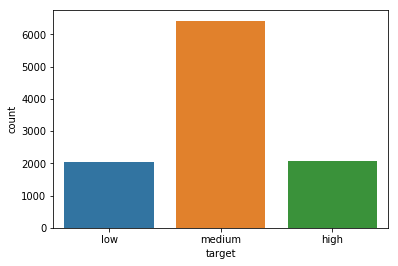

In [340]:
#data['target'].value_counts().plot(kind='bar')
#plt.xlabel('Target')
#plt.ylabel('Frequency')
#plt.title('Frequency of Reviews by Target')

sns.countplot(x='target', order=['low', 'medium', 'high'], data=data)

In [69]:
data.head()

,author,artist,title,genre,date,review_abstract,score,page,target,year,month,self-titled,sophomore,EP
0,Ben Cardew,Tricky,Fall to Pieces,Electronic,2020-09-05,"After a string of misfires, the UK musician’s ...",7.6,1,medium,2020,September,0,0,0
1,Brian Howe,Library Tapes,The Quiet City,ElectronicRock,2020-09-05,The Swedish minimalist composer David Wenngren...,7.0,1,medium,2020,September,0,0,0
2,Mike Powell,Bill Callahan,Gold Record,Rock,2020-09-04,"On his latest solo record, the singer-songwrit...",8.0,1,high,2020,September,0,0,0
3,Zach Schonfeld,Freak Heat Waves,Zap the Planet,RockExperimental,2020-09-04,The funky and hypnotic fourth album from the C...,7.8,1,medium,2020,September,0,0,0
4,Alphonse Pierre,YLZoomo,Born Again,Rap,2020-09-04,The NYC rapper YL’s music is full of slice-of-...,7.1,1,medium,2020,September,0,0,0


In [70]:
data2 = data[['genre', 'target', 'year', 'month', 'self-titled']]

In [71]:
cat_features=[x for x in data2.columns if data2[x].dtype=="object"]

le=LabelEncoder()

for col in cat_features:
    if col in data2.columns:
        i = data2.columns.get_loc(col)
        data2.iloc[:,i] = data2.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [72]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data2.columns :
  data_encoded[i]=label.fit_transform(data2[i])

data_encoded.head()

,genre,target,year,month,self-titled
0,0,2,10,11,0
1,19,2,10,11,0
2,92,0,10,11,0
3,95,2,10,11,0
4,82,2,10,11,0


In [73]:
from scipy.stats import chi2_contingency
import numpy as np




def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [74]:
rows= []

for var1 in data2:
  col = []
  for var2 in data2 :
    cramers =cramers_V(data2[var1], data2[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data2.columns, index =data2.columns)



df

,genre,target,year,month,self-titled
genre,1.00,0.03,0.02,0.01,0.01
target,0.03,1.00,0.01,0.00,0.00
year,0.02,0.01,1.00,0.01,0.00
month,0.01,0.00,0.01,1.00,0.00
self-titled,0.01,0.00,0.00,0.00,1.00


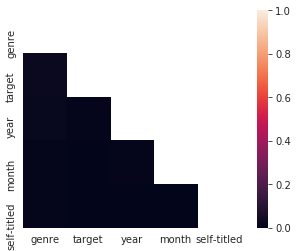

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt



mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

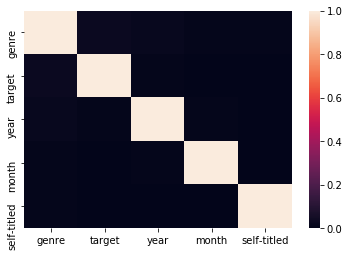

In [76]:
sns.heatmap(df)

,artist,score
3379,MetallicaLou Reed,1.0
1916,Ghostland Observatory,1.5
2012,Greta Van Fleet,1.6
2466,Jessie J,2.0
895,Chiddy Bang,2.1
5098,The Dears,2.4
874,Charlie Puth,2.5
1924,Giorgio Moroder,2.5
3851,POP ETC,2.5
4798,Steve Aoki,2.5


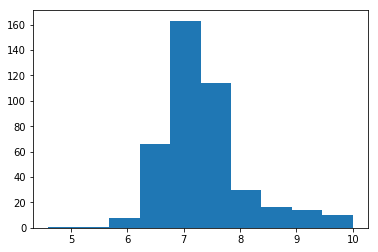

In [77]:
d = data.groupby('artist', as_index=False)['score'].mean()
top_artists = d.nlargest(20,['score'])
bottom_artists = d.nsmallest(20,['score'])

e = data.groupby('title', as_index=False)['score'].mean()
top_albums = e.nlargest(20,['score'])
bottom_albums = e.nsmallest(20,['score'])

f = data.groupby('author', as_index=False)['score'].mean()
top_authors = f.nlargest(20,['score'])
bottom_bottom = f.nsmallest(20,['score'])

plt.hist(f['score'])
#plt.show()

bottom_artists

In [79]:
l = []
for r in data['review_abstract']:
    t = textstat.flesch_reading_ease(r)
    l.append(t)

data['reading_ease'] = l

data.head()

,author,artist,title,genre,date,review_abstract,score,page,target,year,month,self-titled,sophomore,EP,reading_ease
0,Ben Cardew,Tricky,Fall to Pieces,Electronic,2020-09-05,"After a string of misfires, the UK musician’s ...",7.6,1,medium,2020,September,0,0,0,56.59
1,Brian Howe,Library Tapes,The Quiet City,ElectronicRock,2020-09-05,The Swedish minimalist composer David Wenngren...,7.0,1,medium,2020,September,0,0,0,64.71
2,Mike Powell,Bill Callahan,Gold Record,Rock,2020-09-04,"On his latest solo record, the singer-songwrit...",8.0,1,high,2020,September,0,0,0,25.12
3,Zach Schonfeld,Freak Heat Waves,Zap the Planet,RockExperimental,2020-09-04,The funky and hypnotic fourth album from the C...,7.8,1,medium,2020,September,0,0,0,73.51
4,Alphonse Pierre,YLZoomo,Born Again,Rap,2020-09-04,The NYC rapper YL’s music is full of slice-of-...,7.1,1,medium,2020,September,0,0,0,71.14


In [326]:
l = []
for r in data['review_abstract']:
    t = int(textstat.flesch_kincaid_grade(r))
    l.append(t)

data['grade_level'] = l

data.head()

,author,artist,title,genre,date,review_abstract,score,target,year,month,self-titled,sophomore,EP,reading_ease,word_count,high,debut,grade_level
0,Ben Cardew,Tricky,Fall to Pieces,Electronic,2020-09-05,"After a string of misfires, the UK musician’s ...",7.6,medium,2020,September,0,0,0,56.59,23,0,0,11
1,Brian Howe,Library Tapes,The Quiet City,ElectronicRock,2020-09-05,The Swedish minimalist composer David Wenngren...,7.0,medium,2020,September,0,0,0,64.71,30,0,0,8
2,Mike Powell,Bill Callahan,Gold Record,Rock,2020-09-04,"On his latest solo record, the singer-songwrit...",8.0,high,2020,September,0,0,0,25.12,29,1,0,17
3,Zach Schonfeld,Freak Heat Waves,Zap the Planet,RockExperimental,2020-09-04,The funky and hypnotic fourth album from the C...,7.8,medium,2020,September,0,0,0,73.51,23,0,0,8
4,Alphonse Pierre,YLZoomo,Born Again,Rap,2020-09-04,The NYC rapper YL’s music is full of slice-of-...,7.1,medium,2020,September,0,0,0,71.14,17,0,0,7


In [449]:
l = []
for r in data['review_abstract']:
    t = textstat.lexicon_count(r)
    l.append(t)

data['word_count'] = l

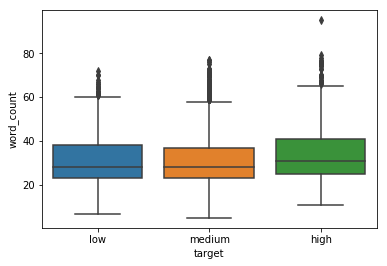

In [113]:
#null average word count for high reviews is higher than other two categorie
sns.boxplot(x='target', y='word_count', order=['low', 'medium', 'high'], data=data)

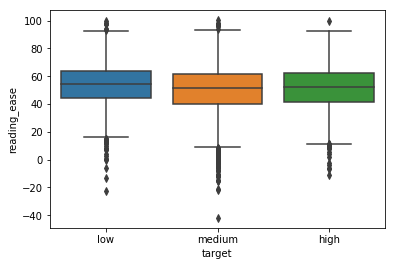

In [114]:
sns.boxplot(x='target', y='reading_ease', order=['low', 'medium', 'high'], data=data)

In [85]:
data['high'] = np.where(data['target'] == 'high', 1, 0)
data.head()

,author,artist,title,genre,date,review_abstract,score,target,year,month,self-titled,sophomore,EP,reading_ease,word_count,high
0,Ben Cardew,Tricky,Fall to Pieces,Electronic,2020-09-05,"After a string of misfires, the UK musician’s ...",7.6,medium,2020,September,0,0,0,56.59,23,0
1,Brian Howe,Library Tapes,The Quiet City,ElectronicRock,2020-09-05,The Swedish minimalist composer David Wenngren...,7.0,medium,2020,September,0,0,0,64.71,30,0
2,Mike Powell,Bill Callahan,Gold Record,Rock,2020-09-04,"On his latest solo record, the singer-songwrit...",8.0,high,2020,September,0,0,0,25.12,29,1
3,Zach Schonfeld,Freak Heat Waves,Zap the Planet,RockExperimental,2020-09-04,The funky and hypnotic fourth album from the C...,7.8,medium,2020,September,0,0,0,73.51,23,0
4,Alphonse Pierre,YLZoomo,Born Again,Rap,2020-09-04,The NYC rapper YL’s music is full of slice-of-...,7.1,medium,2020,September,0,0,0,71.14,17,0


In [86]:
g = data.groupby('month', as_index=False)['high'].mean()
g

,month,high
0,April,0.192108
1,August,0.177728
2,December,0.201271
3,February,0.167217
4,January,0.173010
5,July,0.187283
6,June,0.220833
7,March,0.187160
8,May,0.207605
9,November,0.232057


In [88]:
high = data[data['target'] == 'high']
med = data[data['target'] == 'medium']
low = data[data['target'] == 'low']

In [93]:
df = data.author.value_counts() > 3
df.head()

Ian Cohen           True
Stuart Berman       True
Philip Sherburne    True
Jayson Greene       True
Andy Beta           True
Name: author, dtype: bool

In [451]:
data.to_csv('data.csv', index = False)

In [452]:
data = pd.read_csv('data.csv')

In [478]:
rock_df = data[data['genre'] == 'Rock']
electronic_df = data[data['genre'] == 'Electronic']
rap_df = data[data['genre'] == 'Rap']
pop_and_rnb_df = data[data['genre'] == 'Pop/R&B']
experimental_df = data[data['genre'] == 'Experimental']

In [500]:
from sklearn.feature_extraction.text import CountVectorizer

text = pop_and_rnb_df['review_abstract']
print("Original text is\n{}".format('\n'.join(text)))

vectorizer = CountVectorizer(min_df=0)

# call `fit` to build the vocabulary
vectorizer.fit(text)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()

print("")
print("Transformed text vector is \n{}".format(x))

# `get_feature_names` tracks which word is associated with each column of the transformed x
print("")
print("Words for each feature:")
print(vectorizer.get_feature_names())

Original text is
Ricky Reed, the producer behind Lizzo’s “Truth Hurts” as well as hits by Jason Derulo and Fifth Harmony, offers a solo debut made via livestream and defined by a hazy, late-night melancholy. 

Although recorded in the shadow of tragedy, the Brazilian singer-songwriter’s first album in six years is characteristically delicate in tone and full of charm.

Katy Perry’s bubbly, cliché-ridden pop feels especially unsuited for life in a pandemic. But despite all her garbled platitudes, she remains a master at executing chart-topping formulas.

On her sophomore album, the singer examines good and evil through a series of spare, cryptic parables.

The Australian pop singer finds freedom in the EP format, breaking the family-friendly veneer of past releases and serving up his most idiosyncratic music yet.

Matthew Tyler Musto’s latest album feels like a time capsule for this cursed year, a nauseating sludge of every “Study Beats” playlist and every TikTok influencer’s attempt at

In [501]:
def make_xy(experimental_df, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(experimental_df.review_abstract)
    X = X.tocsc()  # some versions of sklearn return COO format
    #y = data.high.values.astype(np.int)
    #y = data.rock.values.astype(np.int)
    #y = rock_df.high.values.astype(np.int)
    #y = electronic_df.high.values.astype(np.int)
    #y = pop_and_rnb_df.high.values.astype(np.int)
    y = experimental_df.high.values.astype(np.int)
    return X, y 
X, y = make_xy(experimental_df)

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

mn = MultinomialNB()
mn.fit(X_train, y_train)
print(mn.score(X_train, y_train))
print(mn.score(X_test, y_test))

0.9749552772808586
0.7486631016042781


Text(0.5,1,'Cumulative Distribution')

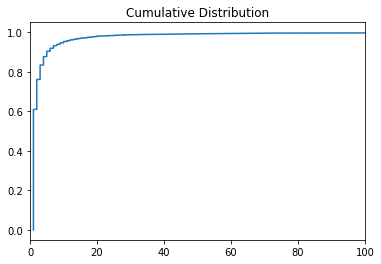

In [503]:
# Your turn.
df = np.sort(np.sum(X>0,axis=0)).reshape(-1,1)
cdf_df= 1. * np.arange(len(df))/float(len(df)-1)

plt.plot(df,cdf_df)
plt.xlim([0,100])
plt.title('Cumulative Distribution')

In [504]:
from sklearn.model_selection import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit the classifier, passed is as clf.
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [505]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    low = y == 0
    high = ~low
    return prob[low, 0].sum() + prob[high, 1].sum()

In [506]:
from sklearn.model_selection import train_test_split
_, itest = train_test_split(range(experimental_df.shape[0]), train_size=0.7)
mask = np.zeros(experimental_df.shape[0], dtype=np.bool)
mask[itest] = True

In [507]:
alphas = [.1, 1, 5, 10, 50]
best_min_df = 10 # YOUR TURN: put your value of min_df here.

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
maxscore=-np.inf
for alpha in alphas:        
    vectorizer = CountVectorizer(min_df=best_min_df)       
    Xthis, ythis = make_xy(experimental_df, vectorizer)
    Xtrainthis = Xthis[mask]
    ytrainthis = ythis[mask]
    # your turn
    clf = MultinomialNB(alpha=alpha)
    score = cv_score(clf, Xtrainthis, ytrainthis, log_likelihood)
    if score > maxscore:
        maxscore = score
        best_alpha = alpha

In [508]:
print("alpha: {}".format(best_alpha))

alpha: 1


In [509]:
vectorizer = CountVectorizer(min_df=best_min_df)
X, y = make_xy(experimental_df, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.906250
Accuracy on test data:     0.716475


In [510]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:100]]
bad_words = words[ind[-100:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

In [381]:
#Predictors of high score

print("Good words\t     P(high | word)")

for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good words	     P(high | word)
           pitchfork 0.89
            eligible 0.89
              sunday 0.89
         significant 0.83
            archives 0.82
                1974 0.79
               today 0.77
         masterpiece 0.77
             revisit 0.76
                1995 0.76


In [379]:
#Predictors of low score

print("Bad words\t     P(high | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Bad words	     P(high | word)
              gender 0.04
                risk 0.04
          minimalist 0.04
                  ep 0.04
             veteran 0.04
             results 0.04
              trying 0.04
              synths 0.04
               sweet 0.03
              follow 0.03


In [434]:
#Predictors for high rock score

print("Good words\t     P(high | word)")

for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good words	     P(high | word)
          remastered 0.85
         masterpiece 0.85
               bowie 0.85
              sunday 0.81
                  25 0.80
            versions 0.80
                 eps 0.80
           pitchfork 0.80
            eligible 0.80
             bracing 0.76


In [464]:
#Predictors of low rock score

print("Bad words\t     P(high | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Bad words	     P(high | word)
                didn 0.05
                matt 0.05
                trio 0.05
              always 0.05
              making 0.05
           recording 0.04
             guitars 0.04
            acoustic 0.04
                them 0.03
                life 0.03


In [446]:
#Predictors for high electronic score

print("Good words\t     P(high | word)")

for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good words	     P(high | word)
            rhythmic 0.75
                 put 0.69
                twin 0.69
           immersive 0.69
             largely 0.69
              strong 0.65
               never 0.60
             instead 0.60
                less 0.60
             massive 0.60


In [447]:
#Predictors of low electronic score

print("Bad words\t     P(high | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Bad words	     P(high | word)
             rhythms 0.06
                soul 0.06
              energy 0.06
            oriented 0.06
                2010 0.06
                2011 0.06
                warp 0.05
             explore 0.05
              studio 0.05
                both 0.04


In [476]:
#Predictors for high rap score

print("Good words\t     P(high | word)")

for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good words	     P(high | word)
               today 0.75
              called 0.75
            eligible 0.73
           pitchfork 0.73
              sunday 0.73
            archives 0.73
         significant 0.73
             revisit 0.70
            powerful 0.70
                  dr 0.70


In [477]:
#Predictors of low rap score

print("Bad words\t     P(high | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Bad words	     P(high | word)
             montana 0.07
                boom 0.07
              return 0.06
                both 0.06
                 age 0.06
                hits 0.06
            explores 0.05
             project 0.05
           producers 0.04
                 hit 0.04


In [495]:
#Predictors for high pop/r&b score

print("Good words\t     P(high | word)")

for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good words	     P(high | word)
           pitchfork 0.79
               today 0.79
               depth 0.75
              sunday 0.75
             himself 0.75
            archives 0.75
         significant 0.75
            eligible 0.75
               never 0.69
                high 0.69


In [496]:
#Predictors of low pop/r&b score

print("Bad words\t     P(high | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Bad words	     P(high | word)
               hynes 0.08
                  or 0.08
              others 0.07
               house 0.07
                over 0.07
              moving 0.06
                 hit 0.06
                 hip 0.05
                 him 0.05
             herself 0.04


In [511]:
#Predictors for high experimental score

print("Good words\t     P(high | word)")

for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good words	     P(high | word)
            reissued 0.79
               takes 0.75
                much 0.75
                jazz 0.75
                dark 0.70
                  uk 0.60
                city 0.60
             decades 0.60
               metal 0.56
             lopatin 0.53


In [512]:
#Predictors of low experimental score

print("Bad words\t     P(high | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Bad words	     P(high | word)
            producer 0.11
                 two 0.11
                from 0.10
                with 0.10
                 who 0.10
                 all 0.10
                  it 0.10
               first 0.10
                 duo 0.08
                  ep 0.05


In [315]:
gw_df = pd.DataFrame({'var1': good_words})
bw_df = pd.DataFrame({'var1': bad_words})

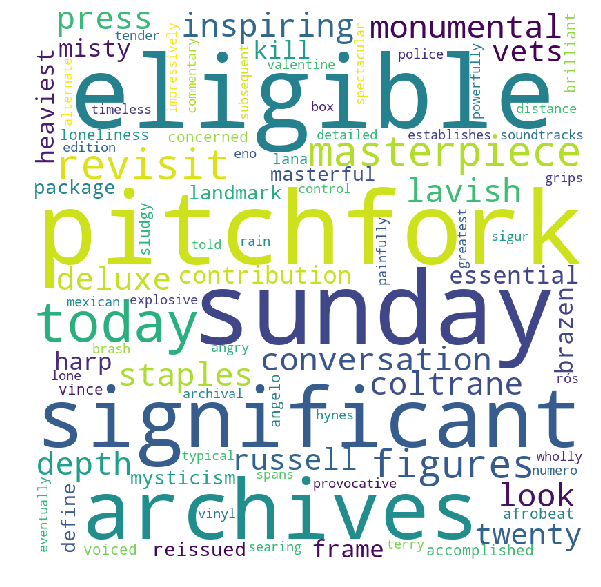

In [316]:
# Low reviews
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in gw_df.var1: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

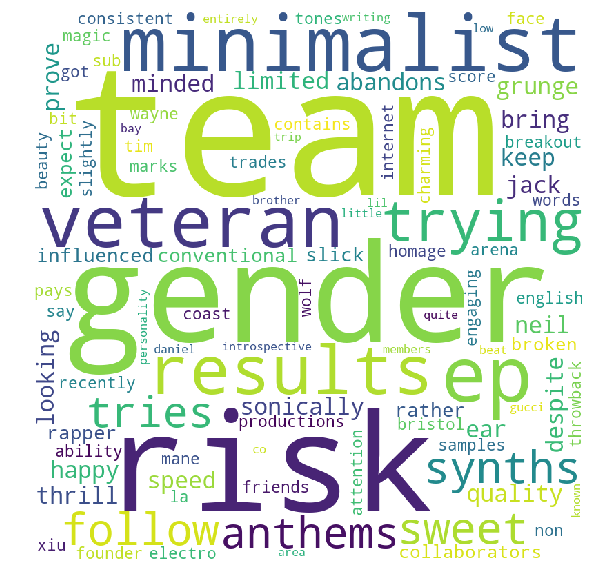

In [317]:
# Low reviews
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in bw_df.var1: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

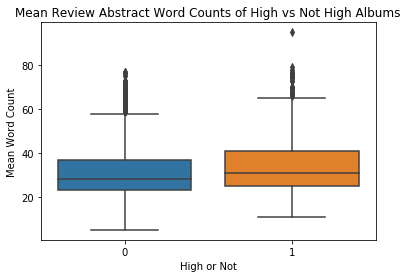

In [324]:
ax = sns.boxplot(x='high', y='word_count', data=data).set(title='Mean Review Abstract Word Counts of High vs Not High Albums', xlabel='High or Not', ylabel='Mean Word Count')

In [155]:
hi = data.query('high == 1')
hi_2 = hi.word_count
lo = data.query('high == 0')
lo_2 = lo.word_count
hi_std = np.std(hi_2)
lo_std = np.std(lo_2)

In [156]:
from scipy.stats import ttest_ind
ttest_ind(hi_2,lo_2)

Ttest_indResult(statistic=10.058610819436408, pvalue=1.0759158020371783e-23)

[Text(0,0.5,'Reading Ease'),
 Text(0.5,0,'High or Not'),
 Text(0.5,1,'Mean Review Abstract Reading Ease of High vs Not High Albums')]

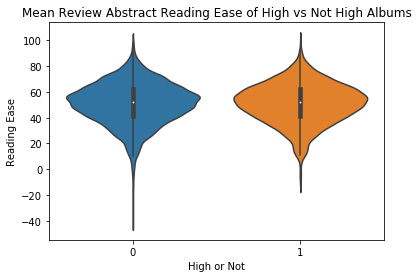

In [332]:
sns.violinplot(x='high', y='reading_ease', data=data).set(title='Mean Review Abstract Reading Ease of High vs Not High Albums', xlabel='High or Not', ylabel='Reading Ease')

In [240]:
hi = data.query('high == 1')
hi_2 = hi.reading_ease
lo = data.query('high == 0')
lo_2 = lo.reading_ease
hi_std = np.std(hi_2)
lo_std = np.std(lo_2)

In [241]:
from scipy.stats import ttest_ind
ttest_ind(hi_2,lo_2)

Ttest_indResult(statistic=0.12373191833211128, pvalue=0.9015298922001512)

In [ ]:
G = data.groupby(["d", "attitude"]).sum()

#mosaic plot
mosaic(G["Freq"])
plt.show()

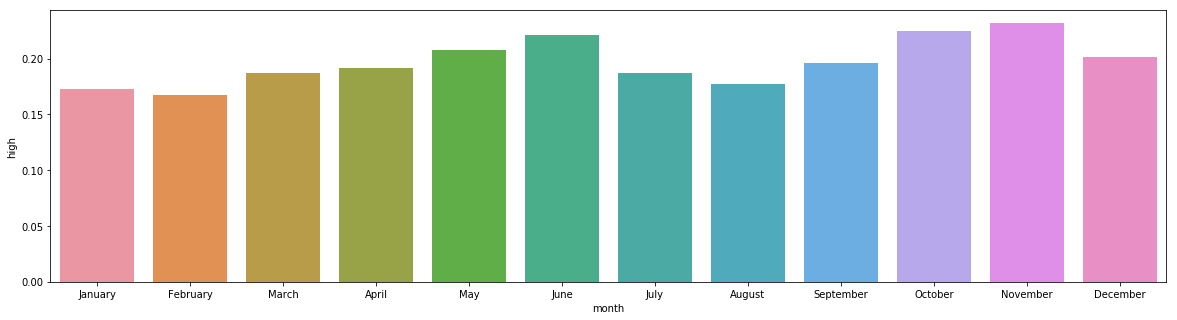

In [118]:
plt.figure(figsize=(20,5))
sns.barplot(x="month", y="high", order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], data=g)

In [310]:
l = []
for r in data['review_abstract']:
    t = textstat.flesch_reading_ease(r)
    l.append(t)

data['reading_ease'] = l

data.head()

In [329]:
x = data.groupby('grade_level', as_index=False)['high'].mean()

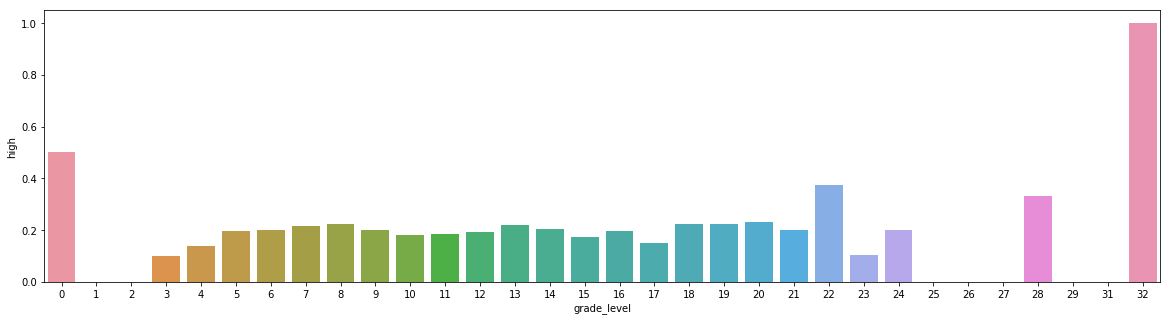

In [331]:
plt.figure(figsize=(20,5))
sns.barplot(x='grade_level', y='high', data=x)

In [409]:
counts = data['genre'].value_counts()
counts.head(10)

Rock                3625
Electronic          1647
Rap                 1427
Pop/R&B              948
Experimental         746
Folk/Country         374
Metal                345
ElectronicRock       305
ExperimentalRock     214
Jazz                 179
Name: genre, dtype: int64

In [480]:
import numpy as np
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)
#dummy_clf.predict(X)
dummy_clf.score(X_test, y_test)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


0.7619047619047619

In [483]:
Cs = [0.001, 0.1, 1, 10, 100]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
parameters = {'C':Cs}
logreg = LogisticRegression()
clf = GridSearchCV(logreg, parameters, scoring='roc_auc')
clf.fit(X_train, y_train)
accuracy_score(clf.predict(X_test), y_test)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.834733893557423

In [521]:
sun = data[data['review_abstract'].str.contains('Sunday', regex=False)]

In [522]:
sun['review_abstract']

22      Each Sunday, Pitchfork takes an in-depth look ...
45      Each Sunday, Pitchfork takes an in-depth look ...
66      Each Sunday, Pitchfork takes an in-depth look ...
89      Each Sunday, Pitchfork takes an in-depth look ...
112     Each Sunday, Pitchfork takes an in-depth look ...
                              ...                        
2833    Each Sunday, Pitchfork takes an in-depth look ...
3717    Each Sunday, Pitchfork takes an in-depth look ...
4277    Brand New's The Devil and God Are Raging Insid...
5614    Taking Flight finds Ryan Hemsworth and largely...
7817    Sunday School II improves on its first install...
Name: review_abstract, Length: 126, dtype: object

In [523]:
gen = data[data['review_abstract'].str.contains('gender', regex=False)]

In [524]:
gen

,author,artist,title,genre,date,review_abstract,score,target,year,month,self-titled,sophomore,EP,reading_ease,word_count,high,debut,grade_level
331,Daniel Felsenthal,Aksak Maboul,Figures,Experimental,2020-05-22,The long-running Belgian avant-garde band expl...,7.2,medium,2020,May,0,0,0,22.41,15,0,0,13
835,Jesse Dorris,Gavilán Rayna Russom,The Envoy,Electronic,2019-12-02,The New York electronic musician fashions an e...,7.8,medium,2019,December,0,0,0,56.25,30,0,0,9
1503,Stuart Berman,Picastro,Exit,Folk/Country,2019-04-27,"Always one for gender subversion, the Toronto ...",7.8,medium,2019,April,0,0,0,43.06,28,0,0,14
1687,Michelle Kim,Angel-Ho,Death Becomes Her,Experimental,2019-03-04,"On her full-length debut, the provocative prod...",7.6,medium,2019,March,0,0,0,36.63,26,0,1,14
1792,Thea Ballard,Terre Thaemlitz,Comp x Comp,Electronic,2019-02-01,As the Tokyo experimental musician’s work is f...,7.0,medium,2019,February,0,0,0,8.20,29,0,0,19
2224,Cameron Cook,Anna Calvi,Hunter,Pop/R&B,2018-09-04,"On her first album in five years, the goth-roc...",7.8,medium,2018,September,0,0,0,19.71,26,0,0,17
3216,Rebecca Bengal,Jackie Shane,Any Other Way,Pop/R&B,2017-10-25,A new box set documents the riveting story of ...,8.5,high,2017,October,0,0,0,55.24,32,1,0,9
3616,Sasha Geffen,Jefre Cantu-Ledesma,On the Echoing Green,Experimental,2017-06-27,The ambient noise artist Jefre Cantu-Ledesma m...,7.7,medium,2017,June,0,0,0,41.70,21,0,0,12
4922,Kevin Lozano,Adult Jazz,Earrings Off!,Rock,2016-05-26,The British experimental rock group Adult Jazz...,6.0,low,2016,May,0,1,0,57.61,22,0,0,10
5009,Barry Walters,Prince,Dirty Mind,Pop/R&BRock,2016-04-29,Prince’s first fully actualized album is an un...,10.0,high,2016,April,0,0,0,30.20,24,1,0,15
